<a href="https://colab.research.google.com/github/prashanthgedde/Coursera-IntroToTF/blob/main/Week2_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ComputerVision execise
Loads Fashion MNIST data for identifying fashion objects

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   2   1   0   0   0  31  90   0   0 

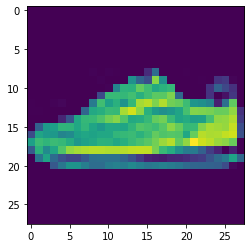

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[52])
print(training_labels[52])
print(training_images[52])

All of the values in the number are between 0 and 255.
It's easier if we treat all values as between 0 and 1, a process called 'normalizing'.

In [6]:
print(training_images[1])
print(training_images[1]/255)

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Design the model now using keras api

In [25]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [26]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5852 - accuracy: 0.7942
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3692 - accuracy: 0.8629
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3276 - accuracy: 0.8791
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2955 - accuracy: 0.8917
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2785 - accuracy: 0.8967
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2674 - accuracy: 0.9005
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2494 - accuracy: 0.9054
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2413 - accuracy: 0.9108
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2308 - accuracy: 0.9138
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.221

In [23]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8863


[0.3528279662132263, 0.8863000273704529]

In [24]:
classifications = model.predict(test_images)

print(classifications[0])

int_array = (classifications*100).astype(int)

print(int_array[0])

[1.1682960e-08 2.1670008e-08 4.2215174e-09 9.3956093e-11 1.9760698e-09 6.8500144e-06 1.1287540e-09 6.6595767e-03 1.0136803e-09 9.9333352e-01]
[ 0  0  0  0  0  0  0  0  0 99]


9


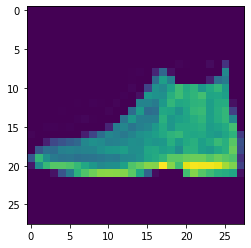

In [ ]:
print(test_labels)
plt.imshow(test_images[0])